# Sprint 5 T1

EJERCICIOS DE HIPOTESIS TESTING

## Exercicio 1

**Descarga el dataset adjunto de datos oficiales de la UEFA y selecciona un atributo del conjunto de datos. Calcula el p-valor y di si rechaza la hipótesis nula con un alfa de 5%. 

In [1]:
# Importamos las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# permite incrustar gráficos en jupyter notebooks.

In [2]:
# Descargamos el dataset. Se ha tenido que especificar el encoding porque tenía carácteres ilegibles y el tipo de separación
ruta_archivo = "C:\\Users\\gemma\\OneDrive\\Escritorio\\It Academy Tasks\\SP 5 T1\\Lligues europees UEFA.csv"

df_uefa = pd.read_csv(ruta_archivo, sep=";",encoding="ISO-8859-1")
df_uefa.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


Para poder trabajar con los datos, he tenido que buscar el significado de cada atributo.

1. **Rk**: ranking de los equipos en la competición. 

2. **Squad**: nombre del equipo.

3. **Country**: país al que pertenece el equipo.

4. **LgRk**: clasificación del equipo en su liga nacional.

5. **MP**: Número de partidos jugados por el equipo en la competición.

6. **W**: Número de victorias del equipo.

7. **D**: Número de empates del equipo.

8. **L**: Número de derrotas del equipo.

9. **GF**: Número de goles a favor marcados por el equipo en la competición.

10. **GA**: Número de goles en contra recibidos por el equipo en la competición.

11. **GD (Goal Difference)**: Diferencia de goles, que se calcula restando los goles en contra (GA) de los goles a favor (GF).

12. **Pts (Points)**: Puntos obtenidos por el equipo en la competición. Los puntos se otorgan por victorias (3 puntos), empates (1 punto) y derrotas (0 puntos).

13. **Pts/G (Points per Game)**: Promedio de puntos por partido jugado (total de puntos /  número de partidos jugados).

14. **xG (Expected Goals)**: cantidad de goles esperados que debería haber marcado en función de las oportunidades de gol creadas. Es una métrica que evalúa la calidad de las oportunidades de gol.

15. **xGA (Expected Goals Against)**: cantidad de goles esperados que un equipo debería haber encajado en función de las oportunidades de gol concedidas a los oponentes.

16. **xGD (Expected Goal Difference)**: Diferencia de goles esperada. (goles esperados a favor (xG) - goles esperados en contra (xGA)). Puede ayudar a evaluar el rendimiento real del equipo en comparación con su desempeño esperado.

17. **xGD/90 (Expected Goal Difference per 90 minutes)**: diferencia de goles esperada por cada 90 minutos de juego.

18. **Last 5**: Rendimiento del equipo en sus últimos cinco partidos, mostrando el número de victorias, empates y derrotas en ese período. W: ganado, D: empate, L: perdido.

19. **Attendance**: La asistencia promedio de espectadores en los partidos del equipo.

20. **Top Team Scorer**: El nombre del máximo goleador o anotador del equipo en la competición.

21. **Goalkeeper**: El nombre del portero titular del equipo en la competición.

Una vez entendido el dataset ya podemos empezar a **prepararlo** (limpiarlo de duplicados, valores, null, valores NAN) y **analizarlo** brevemente.

In [3]:
df_uefa.shape


(98, 21)

Este dataset está compuesto por 21 atributos (columnas) y 98 registros (filas)

In [4]:
# eliminamos registros duplicados en caso de que los haya
df_uefa.drop_duplicates()
df_uefa.shape

(98, 21)

In [5]:
# miramos que no haya valores faltantes
df_uefa.isna().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [6]:
# observamos el tipo de atributos(columnas) que hay y vemos si tiene valores null
df_uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

Podemos observar que no hay valores nulos.

Para poder hacer comparativas vamos a convertir dos atributos en categoría: Country (país) y LgRk (clasificación en su liga).

In [7]:
df_uefa["Country"] = df_uefa["Country"].astype("category")
df_uefa["LgRk"] = df_uefa["LgRk"].astype("category")
df_uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Rk               98 non-null     int64   
 1   Squad            98 non-null     object  
 2   Country          98 non-null     category
 3   LgRk             98 non-null     category
 4   MP               98 non-null     int64   
 5   W                98 non-null     int64   
 6   D                98 non-null     int64   
 7   L                98 non-null     int64   
 8   GF               98 non-null     int64   
 9   GA               98 non-null     int64   
 10  GD               98 non-null     int64   
 11  Pts              98 non-null     int64   
 12  Pts/G            98 non-null     float64 
 13  xG               98 non-null     float64 
 14  xGA              98 non-null     float64 
 15  xGD              98 non-null     float64 
 16  xGD/90           98 non-null     float64 
 17 

In [8]:
df_uefa.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Rk,98.0,49.50,28.43,1.00,25.25,49.50,73.75,98.00
MP,98.0,36.31,1.15,34.00,36.00,37.00,37.00,37.00
W,98.0,13.45,5.75,3.00,9.00,13.00,17.00,28.00
D,98.0,9.41,2.90,3.00,7.00,9.00,11.00,16.00
L,98.0,13.45,5.12,2.00,10.00,13.00,17.00,26.00
GF,98.0,50.88,16.10,23.00,39.00,47.00,60.00,97.00
GA,98.0,50.88,13.63,24.00,40.00,50.00,59.00,89.00
GD,98.0,0.00,26.50,-56.00,-17.75,-1.00,17.25,72.00
Pts,98.0,49.73,16.17,18.00,37.00,46.00,61.75,90.00
Pts/G,98.0,1.37,0.44,0.53,1.00,1.30,1.69,2.43


In [9]:
df_uefa.describe(include = ["object","category"]).T

,count,unique,top,freq
Squad,98,98,Manchester City,1
Country,98,5,ENG,20
LgRk,98,20,1,5
Last 5,98,80,W W W L L,4
Top Team Scorer,98,98,Kevin De Bruyne - 15,1
Goalkeeper,98,98,Ederson,1


In [10]:
df_uefa['Country'].value_counts()


ENG    20
ESP    20
FRA    20
ITA    20
GER    18
Name: Country, dtype: int64

Ahora que hemos visto el dataset podemos indicar que está compuesto por 5 ligas, todas de 20 equipos a excepción de la alemana que consta de 18 equipos. 


Seleccionamos un atributo del dataset y calcularemos el p-valor para ver si rechaza la hipótesis nula con un alfa de 5%. 


In [11]:
import pandas as pd

# Supongamos que tienes un DataFrame df_uefa con las columnas "Country", "W", "D", "L", "GF", "GA", "GD" y "Pts".

# Se agrupa el dataset por la columna "Country" y seleccionamos las columnas específicas para el resumen estadístico deseado (mean, max y min).
df_uefa_country = df_uefa.groupby("Country")[["W", "D", "L", "GF", "GA", "GD", "Pts"]].agg({
    "W": ["mean", "max", "min"],
    "D": ["mean", "max", "min"],
    "L": ["mean", "max", "min"],
    "GF": ["mean", "max", "min"],
    "GA": ["mean", "max", "min"],
    "GD": ["mean", "max", "min"],
    "Pts": ["mean", "max", "min"]
})

print(df_uefa_country)


                 W                  D                  L            GF  ...  \
              mean max min       mean max min       mean max min  mean  ...   
Country                                                                 ...   
ENG      13.950000  28   5   8.600000  15   3  13.950000  26   2  50.9  ...   
ESP      13.050000  26   7  10.900000  16   7  13.050000  22   4  46.5  ...   
FRA      13.600000  25   5   9.800000  13   5  13.600000  20   4  51.5  ...   
GER      12.944444  24   3   8.111111  13   3  12.944444  22   5  53.0  ...   
ITA      13.650000  25   4   9.500000  16   5  13.650000  23   4  52.7  ...   

               GA           GD                Pts          
        min  mean max min mean max min       mean max min  
Country                                                    
ENG      23  50.9  79  24  0.0  72 -56  50.450000  90  22  
ESP      31  46.5  74  30  0.0  49 -33  50.050000  85  31  
FRA      34  51.5  89  34  0.0  49 -41  50.500000  83  28  
GER    

In [12]:
# Hacemos lo mismo agrupado por posición en cada liga
df_uefa_ranking = df_uefa.groupby("LgRk")[["W", "D", "L", "GF", "GA", "GD", "Pts"]].agg({
    "W": ["mean", "max", "min"],
    "D": ["mean", "max", "min"],
    "L": ["mean", "max", "min"],
    "GF": ["mean", "max", "min"],
    "GA": ["mean", "max", "min"],
    "GD": ["mean", "max", "min"],
    "Pts": ["mean", "max", "min"]
})

print(df_uefa_ranking)

         W              D              L            GF  ...         GA      \
      mean max min   mean max min   mean max min  mean  ... min   mean max   
LgRk                                                    ...                  
1     25.6  28  24   6.80   8   5   4.00   5   3  84.8  ...  66  31.80  37   
2     22.6  26  20   7.60  10   3   6.00   9   2  77.2  ...  63  36.40  52   
3     20.4  23  19   8.00  10   7   7.80   9   6  69.2  ...  59  37.80  47   
4     19.0  21  17   8.40  16   5   8.80  12   4  64.6  ...  52  35.60  40   
5     18.2  21  16   7.80  12   3  10.00  12   8  60.0  ...  50  44.20  53   
6     16.8  19  15   9.40  11   7  10.20  11   9  51.8  ...  39  42.80  56   
7     16.0  18  14   8.80  11   5  11.40  13  10  57.6  ...  52  45.40  49   
8     14.8  16  13   9.60  13   6  12.00  16  10  51.8  ...  37  43.40  50   
9     13.4  15  12   9.20  11   7  13.60  14  13  53.6  ...  37  53.80  60   
10    12.4  14  11  11.40  15   9  12.60  15  11  45.6  ...  39 

Así podemos comparar registros de diferentes atributos.

### Selecciona un atributo del conjunto de datos. Calcula el p-valor y di si rechazas la hipótesi nula teniendo un valor alfa de 5%. 

Para llevar a cabo este ejercicio selecciono el atributo W (Partidos Ganados) para ver si estamos hablando de una distribución normal o no.

Primer paso:
    * Plantea la hipótesis nula y la hipótesis alternativa
    
    H = los datos siguen una distribución normal
    H1 = los datos no siguen una distribución normal

Segundo paso:
    Selección del nivel de significación (alfa)
    
    alfa = 5% (0.05)
    
Tercer paso:
    Recopilación de los datos
    
    Los datos están en el dataset df_uefa
    
Cuarto paso:
    Elección de la prueba estadística
    
    Al tratarse de un sólo atributo y querer saber si será o no una distribución normal usaremos el **Shapiro-Wilk Test**
    
Quinto paso:
    Cálculo de Estadísticas y Valor p o p-value



In [13]:
from scipy.stats import shapiro
stat, p = shapiro(df_uefa["W"])
print("stat=%.3f, p=%.3f" % (stat, p))
if p > 0.05:
	print("Probablemente es una distribución normal")
else:
	print("Probablemente no es una distribución normal")

stat=0.965, p=0.011
Probablemente no es una distribución normal


Sexto paso:
    Interpretación y toma de decisiones
    
    El test de Saphiro-Wilk nos da un valor de p mucho más pequeño que alfa. De manera que hemos de descartar la hipótesis nula (H0). Eso significa que la distribución que siguen estos datos no es normal. 
    
Para confirmar los resultados del test vamos a crear un histograma con los valores de "W"

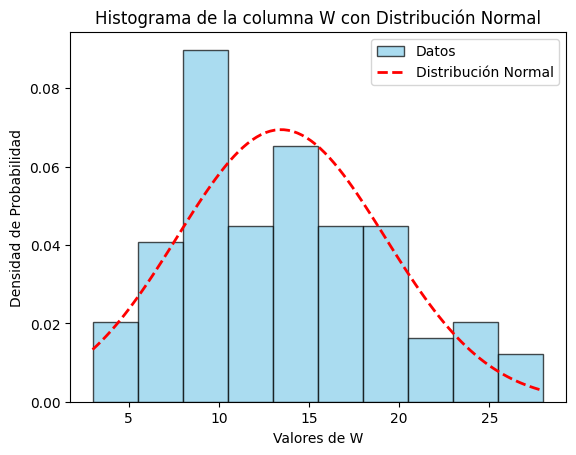

In [14]:
import scipy.stats as stats


plt.hist(df_uefa["W"], bins=10, color='skyblue', edgecolor='black', density=True, alpha=0.7, label='Datos')

plt.title("Histograma de la columna W")
plt.xlabel("Valores de W")
plt.ylabel("Frecuencia")

mean = df_uefa["W"].mean()
std_dev = df_uefa["W"].std()


# Crea los valores que debería tener la distribución normal de este atributo para poder visualizarlo en el gráfico y así comparar
x = np.linspace(df_uefa["W"].min(), df_uefa["W"].max(), 100)
pdf = stats.norm.pdf(x, mean, std_dev)


plt.plot(x, pdf, color="red", linestyle="dashed", linewidth=2, label="Distribución Normal")


plt.title("Histograma de la columna W con Distribución Normal")
plt.xlabel("Valores de W")
plt.ylabel("Densidad de Probabilidad")


plt.legend()


plt.show()





Confirmamos visualmente que los valores del atributo "W" no tienen una distribución normal. La línea de puntos nos muestra cómo sería la distribución normal para estos datos. 

Para evitar tener que hacer esto con otros atributos. Haremos un histograma con los principales atributos. Esto nos permitirá ver como es su distribución a simple vista.

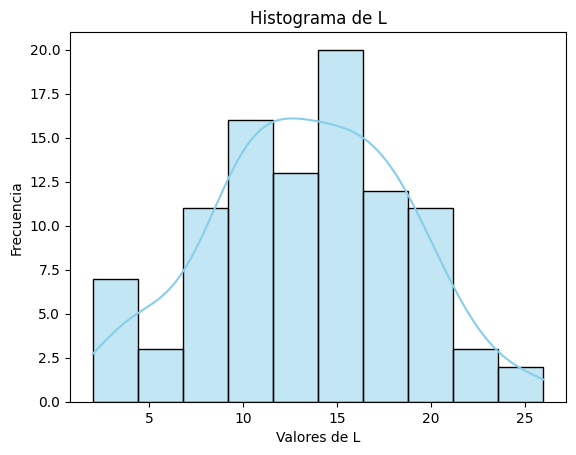

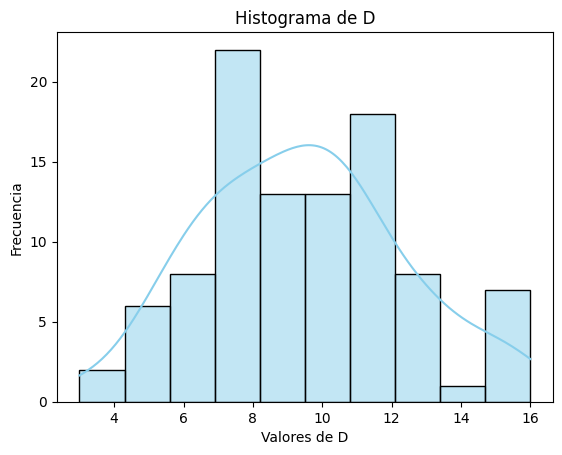

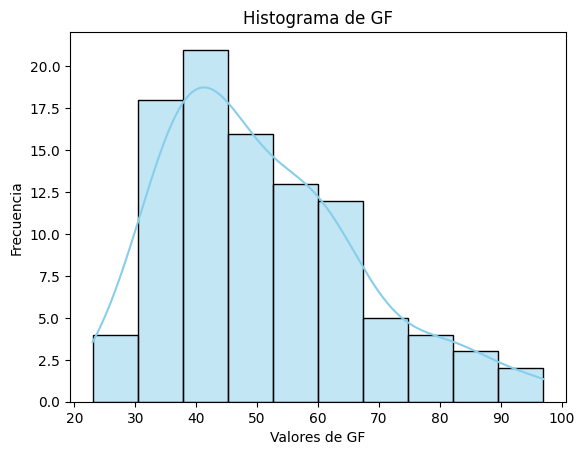

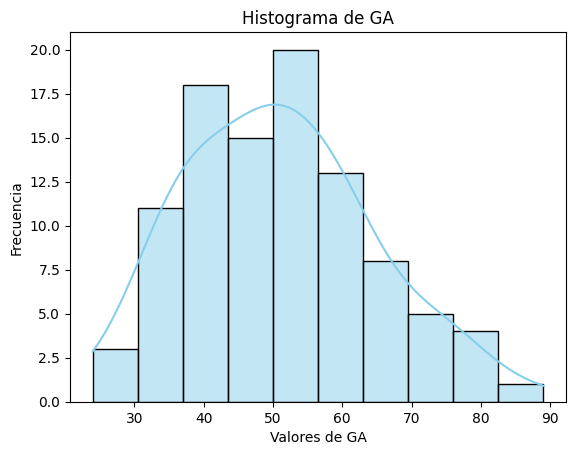

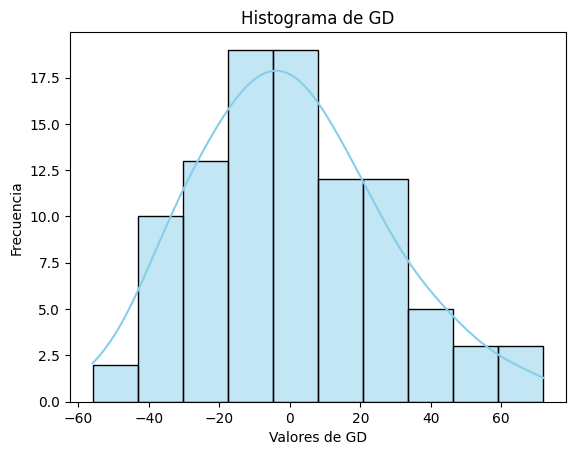

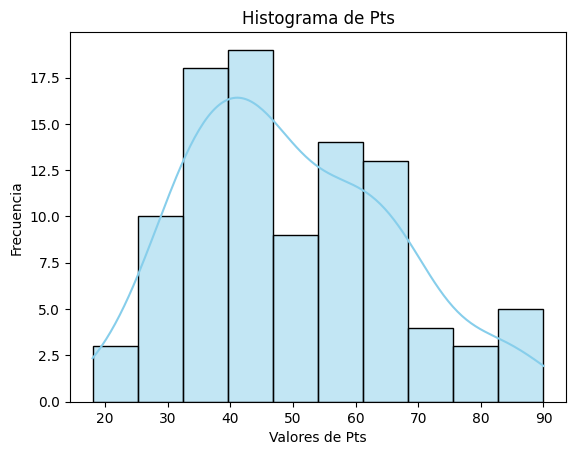

In [15]:
# Seleccionamos las columnas a visualizar.
columnas_hist = ["L","D", "GF", "GA", "GD", "Pts"]

# Crea un histograma para cada columna
for column in columnas_hist:
    sns.histplot(df_uefa[column], bins=10,kde=True, color="skyblue")
    plt.title(f"Histograma de {column}")
    plt.xlabel(f"Valores de {column}")
    plt.ylabel("Frecuencia")
    plt.show()


## Exercicio 2

**Con el mismo dataset selecciona otros dos atributos del conjunto de datos. Calcula los p-valores y di si rechazan la hipótesis nula con un alfa de 5%.

Para poder decicir que atributos vamos a seleccionar, primero chequearemos la correlación entre ellos. Primero lo haremos a través de una tabla y luego lo haremos con un mapa de calor. Lo cual nos permitirá verlo de una manera más sencilla y rápida.



In [16]:
df_uefa.corr()

,Rk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
Rk,1.000000,0.048452,-0.966555,0.301579,0.924273,-0.855210,0.837186,-0.950350,-0.975809,-0.982258,-0.817633,0.789226,-0.896688,-0.895620,-0.542683
MP,0.048452,1.000000,0.016391,0.251907,0.063785,-0.083514,-0.049424,-0.025317,0.061955,-0.036399,-0.065936,-0.039456,-0.021589,-0.022025,0.032255
W,-0.966555,0.016391,1.000000,-0.438612,-0.869553,0.880804,-0.795596,0.944505,0.986890,0.986395,0.851354,-0.753535,0.900125,0.898715,0.583984
D,0.301579,0.251907,-0.438612,1.000000,-0.017991,-0.364518,0.070288,-0.257648,-0.288033,-0.315227,-0.325834,0.072106,-0.238222,-0.241650,-0.243187
L,0.924273,0.063785,-0.869553,-0.017991,1.000000,-0.800298,0.841547,-0.919229,-0.929928,-0.936085,-0.785229,0.795575,-0.879614,-0.876187,-0.510045
GF,-0.855210,-0.083514,0.880804,-0.364518,-0.800298,1.000000,-0.585596,0.908890,0.873521,0.886530,0.919444,-0.600808,0.867793,0.871334,0.483135
GA,0.837186,-0.049424,-0.795596,0.070288,0.841547,-0.585596,1.000000,-0.870293,-0.835098,-0.828477,-0.592486,0.861637,-0.791906,-0.787094,-0.376617
GD,-0.950350,-0.025317,0.944505,-0.257648,-0.919229,0.908890,-0.870293,1.000000,0.960402,0.964901,0.863488,-0.808352,0.934701,0.934376,0.487320
Pts,-0.975809,0.061955,0.986890,-0.288033,-0.929928,0.873521,-0.835098,0.960402,1.000000,0.994677,0.848167,-0.790710,0.916410,0.914305,0.579261
Pts/G,-0.982258,-0.036399,0.986395,-0.315227,-0.936085,0.886530,-0.828477,0.964901,0.994677,1.000000,0.858782,-0.786105,0.920749,0.919601,0.573021


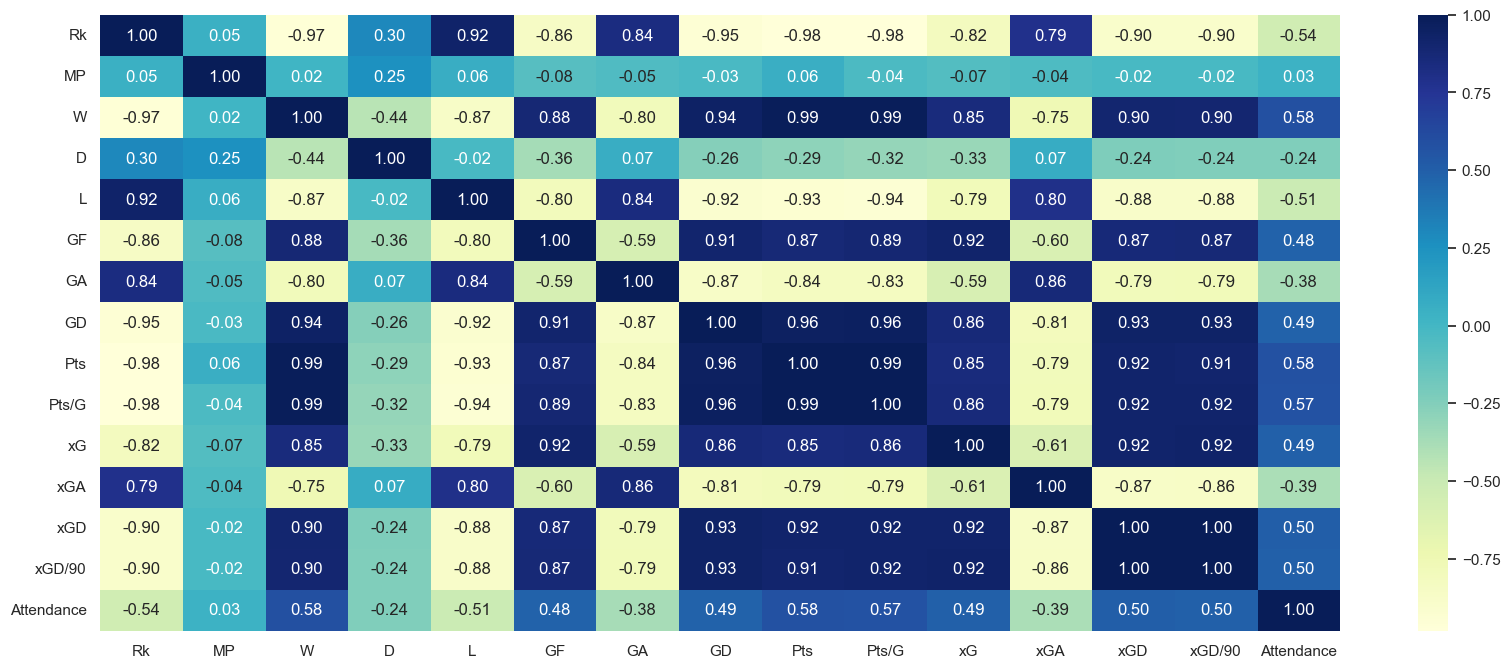

In [17]:
sns.set()
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(df_uefa.corr(),annot=True, cmap='YlGnBu', fmt=".2f")

Elegimos algunos atributos para ver más de cerca su relación con unos gráficos de dispersión. Estos atributos son:
- **W**: número de partidos ganados
- **L**: numero de partidos perdidos
- **D**: número de partidos empatados
- **GF**: Goles marcados
- **GD**: Goles recibidos
- **Pts**: Puntos conseguidos

C:\Users\gemma\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


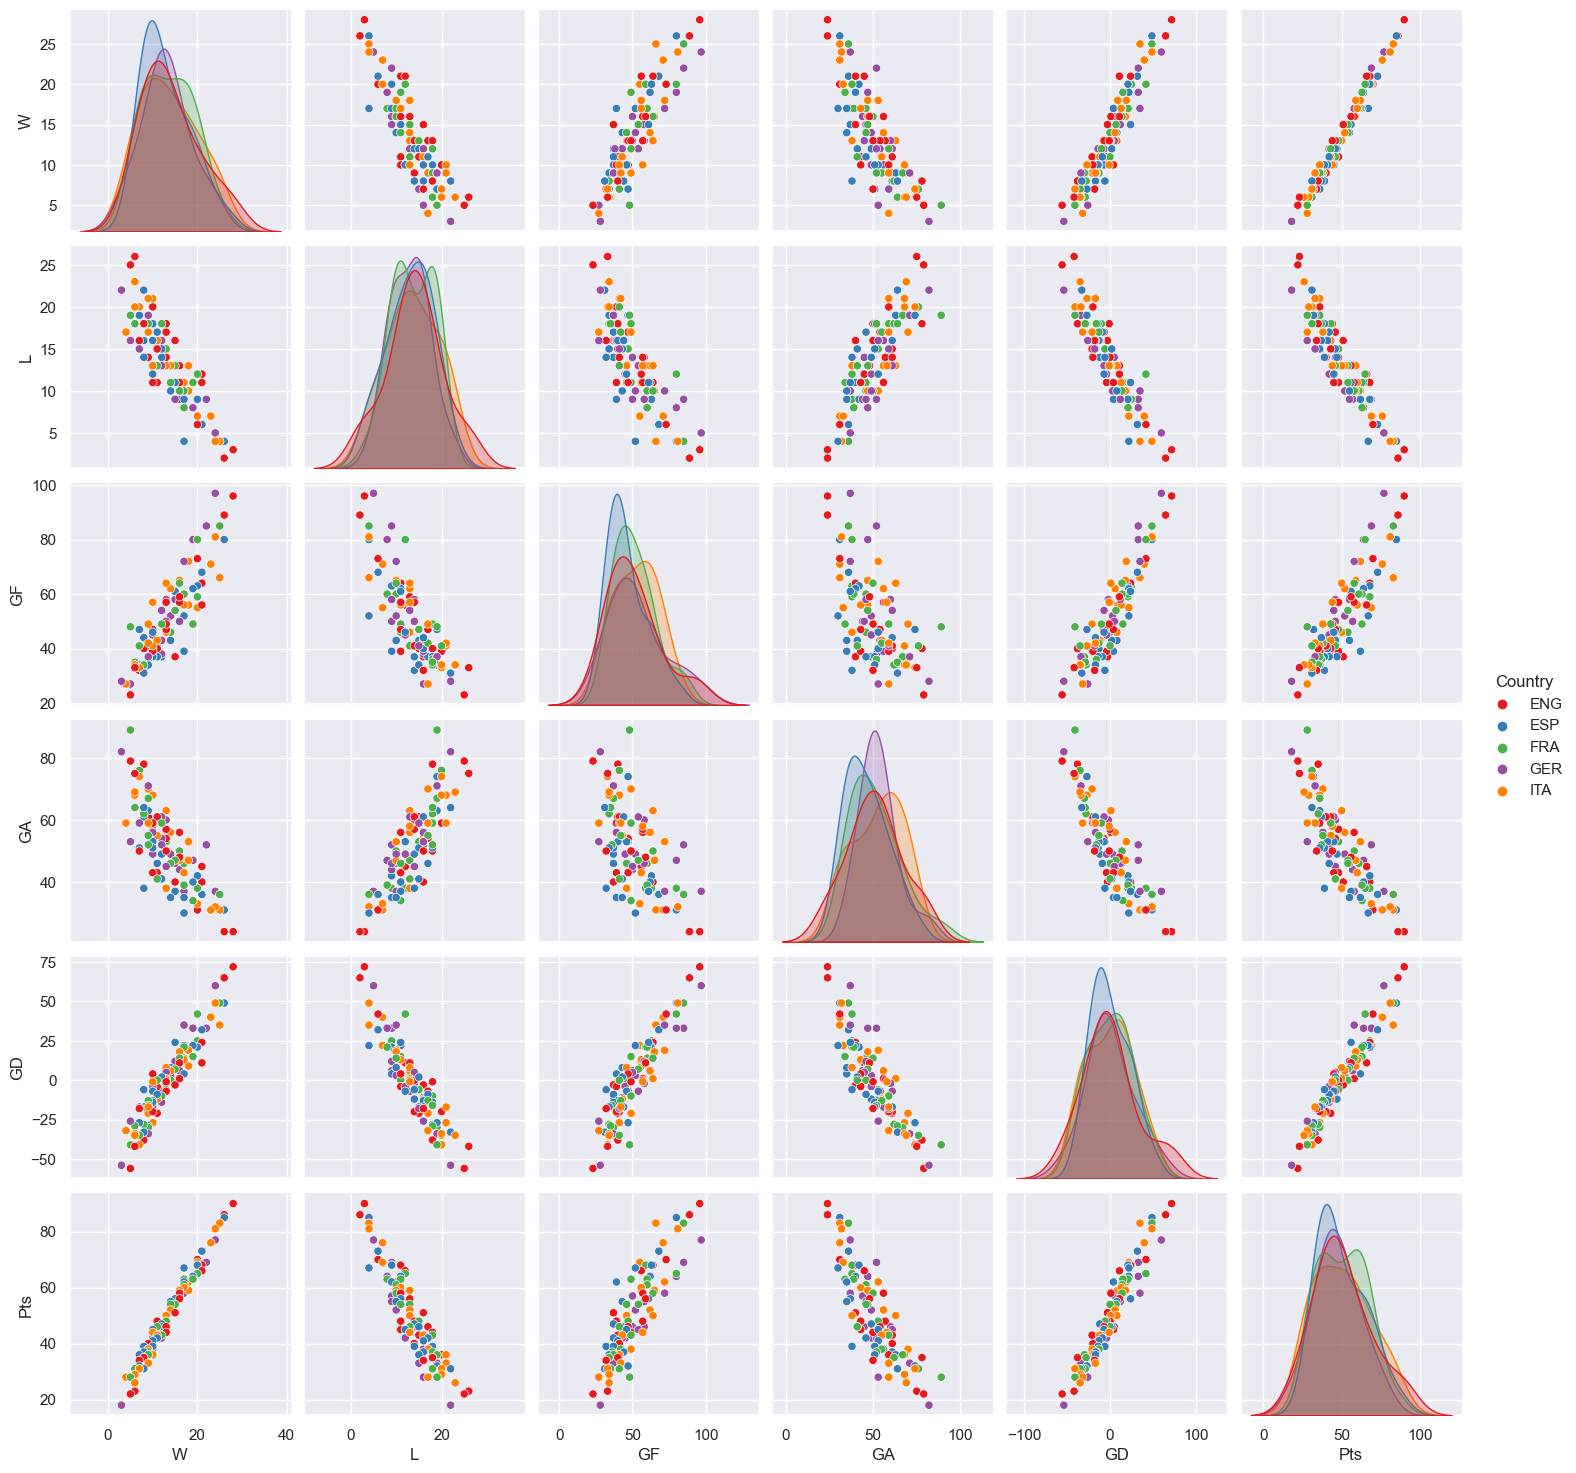

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Crea la matriz de gráficos de dispersión con colores basados en la columna "Country".
sns.pairplot(df_uefa[["W", "L", "GF", "GA", "GD", "Pts", "Country"]], hue="Country", palette="Set1")
plt.show()


Analizando los gráficos anteriores, se observa que hay mucha relación entre los diferentes atributos. En la mayoría de los casos la correlación es positiva y en algunos negativa. También hay otros atributos que parecen no tener mucha relación entre si como es el caso de los GF (goles marcados) y GA (goles recibidos).

Para este ejercicio usaremos el **Chi-Squared Test**. Este test permite ver si dos atributos están relacionados o son independientes. De esta manera podremos saber si estos dos atributos, GF y GA, son independientes o están relacionados.

Primer paso:
    * Plantea la hipótesis nula y la hipótesis alternativa
    
    Ho = los datos son independientes
    H1 = los datos no son independientes

Segundo paso:
    Selección del nivel de significación (alfa)
    
    alfa = 5% (0.05)
    
Tercer paso:
    Recopilación de los datos
    
    Los datos están en el dataset df_uefa
    
Cuarto paso:
    Elección de la prueba estadística
    
    Para poder saber si los atributos estan relacionados o no usaremos el **Chi-Squared Test**
    
Quinto paso:
    Cálculo de Estadísticas y Valor p o p-value

In [19]:
from scipy.stats import chi2_contingency
table = [df_uefa["GF"],df_uefa["GA"]]
stat, p, dof, expected = chi2_contingency(table)
print("stat=%.3f, p=%.3f" % (stat, p))
if p > 0.05:
 print("Se acepta la Ho. Probablemente sean dos atributos independientes")
else:
 print("Se rechaza la Ho. Probablemente estos dos atributos están relacionados")

stat=628.825, p=0.000
Se rechaza la Ho. Probablemente estos dos atributos están relacionados


Sexto paso: Interpretación y toma de decisiones

El test nos da un valor de p de 0. Lo que nos hace rechazar la hipótesis nula. Eso significa que si que hay relación entre los goles marcados (GF) y los goles recibidos (GA). 

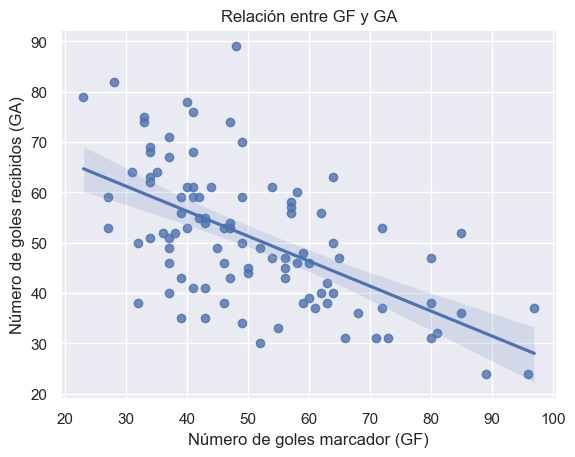

In [20]:
sns.regplot(x='GF', y='GA', data=df_uefa)

plt.title("Relación entre GF y GA")
plt.xlabel("Número de goles marcador (GF)")
plt.ylabel("Número de goles recibidos (GA)")

plt.show()

### Exercicio 3

**Continua con el conjunto de datos adjunto y selecciona tres atributos del conjunto de datos. Calcula el p-valor y di si rechaza la hipótesis nula con un valor alfa del 5%.**

Para este ejercicio vamos a comparar los puntos (Pts)con los goles marcados (GF) con la cantidad de goles podrían haber marcado (xG).

Primer paso:
    * Plantea la hipótesis nula y la hipótesis alternativa
    
    Ho = No hay diferencia significativa en los puntos, los goles marcados y la oportunidd de gol.
    H1 = Hay diferencia significativa en los puntos, los goles marcados y la oportunidd de gol.

Segundo paso:
    Selección del nivel de significación (alfa)
    
    alfa = 5% (0.05)
    
Tercer paso:
    Recopilación de los datos
    
    Los datos están en el dataset df_uefa
    
Cuarto paso:
    Elección de la prueba estadística
    
    ANOVA (Análisis de Varianza) para comparar las medias de varias muestras.
    
Quinto paso:
    Cálculo de Estadísticas y Valor p o p-value


In [21]:
from scipy.stats import f_oneway

stat, p = f_oneway(df_uefa["Pts"], df_uefa["GF"], df_uefa["xG"])
print("stat=%.3f, p=%.3f" % (stat, p))
if p > 0.05:
	print("Se acepta la Ho. No hay diferencia significativa en los puntos, los goles marcados y la oportunidd de gol.")
else:
	print("Se rechaza la Ho. Hay diferencia significativa en los puntos, los goles marcados y la oportunidd de gol.")

stat=0.538, p=0.584
Se acepta la Ho. No hay diferencia significativa en los puntos, los goles marcados y la oportunidd de gol.


Sexto paso: Interpretación y toma de decisiones

El test nos da un valor de p de 0,584. Lo que nos hace aceptar la hipótesis nula. Eso significa que no hay una diferencia significativa entre los puntos, los goles marcados y la oportunidad de marcar un gol.

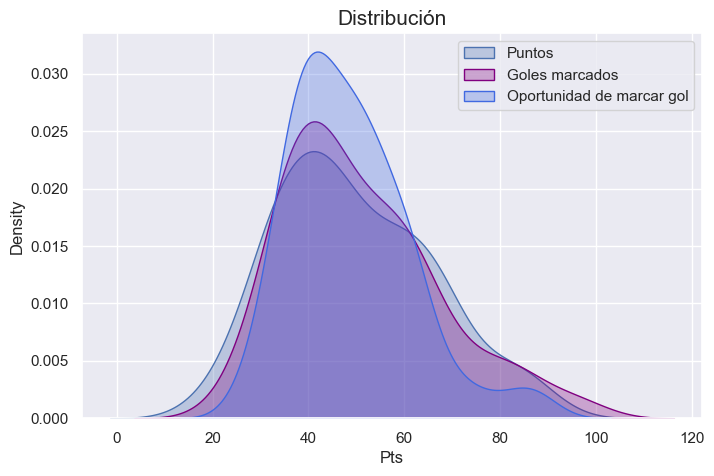

In [22]:
plt.figure(figsize= (8,5))

sns.kdeplot(df_uefa["Pts"],  label= "Puntos", fill = True, alpha= 0.30)
sns.kdeplot(df_uefa["GF"], label= "Goles marcados", color= 'purple', fill = True, alpha = 0.30)
sns.kdeplot(df_uefa["xG"], label= "Oportunidad de marcar gol", fill = True, alpha= 0.30, color='royalblue')

plt.title("Distribución", fontsize = 15)
plt.legend()
plt.show()